<a href="https://www.kaggle.com/code/punyamodi/tesla-stock-prediciting?scriptVersionId=140568433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA Testing.csv
/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv


In [170]:
training=pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv')
print(training.head())
print(training.tail())

         Date  Open  High   Low  Close  Adj Close     Volume
0  2018-06-22 23.44 23.48 22.13  22.24      22.24  153991500
1  2018-06-25 22.01 22.56 21.83  22.20      22.20  103969500
2  2018-06-26 22.40 22.90 21.72  22.80      22.80  111787500
3  2018-06-27 23.00 23.39 22.63  22.97      22.97  125005500
4  2018-06-28 23.24 23.80 23.07  23.33      23.33  125970000
            Date   Open   High    Low  Close  Adj Close     Volume
1252  2023-06-14 260.17 261.57 250.50 256.79     256.79  170575500
1253  2023-06-15 248.40 258.95 247.29 255.90     255.90  160171200
1254  2023-06-16 258.92 263.60 257.21 260.54     260.54  167563700
1255  2023-06-20 261.50 274.75 261.12 274.45     274.45  165611200
1256  2023-06-21 275.13 276.99 257.78 259.46     259.46  210937500


In [171]:
training.shape
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


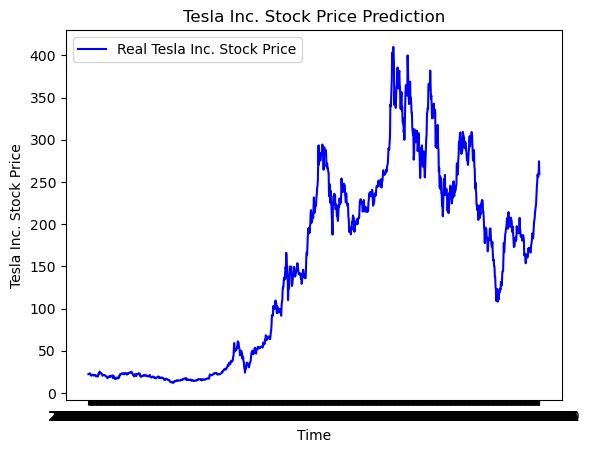

In [172]:
# Visualising the results
plt.plot(training["Date"],training["Close"], color='blue', label='Real Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

In [173]:
print(training['Close'].equals(training['Adj Close']))

True


From this we can see that dataset has no non-null values, and has shape 1257x7

also we get to know column close and adj close are same so we can remove adj close from datat set

In [174]:
X=pd.DataFrame()
X=training[["Open","High","Low","Volume"]].copy()
y=pd.Series()
y=training[["Close"]].copy()
X.shape

(1257, 4)

In [175]:
y.shape

(1257, 1)

Hence i have succesfully created 2 dataframes with relevant data needed to feed to ml model

Converting all data within 0 to 1 range

In [176]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))
#X= sc.fit_transform(X)
#y=sc.fit_transform(y)

In [177]:
print(y)
print(X)

      Close
0     22.24
1     22.20
2     22.80
3     22.97
4     23.33
...     ...
1252 256.79
1253 255.90
1254 260.54
1255 274.45
1256 259.46

[1257 rows x 1 columns]
       Open   High    Low     Volume
0     23.44  23.48  22.13  153991500
1     22.01  22.56  21.83  103969500
2     22.40  22.90  21.72  111787500
3     23.00  23.39  22.63  125005500
4     23.24  23.80  23.07  125970000
...     ...    ...    ...        ...
1252 260.17 261.57 250.50  170575500
1253 248.40 258.95 247.29  160171200
1254 258.92 263.60 257.21  167563700
1255 261.50 274.75 261.12  165611200
1256 275.13 276.99 257.78  210937500

[1257 rows x 4 columns]


In [178]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.25,shuffle=False)


# Preparing Data For Training

# Here For LSTM, we havr to Introduce Lag to predict Future stock, hence adding columns of last 10 days to current data to predict the price after 10 days.

In [179]:
y_train=y_train.iloc[2:]
y_test=y_test.iloc[2:]
X_train = X_train.iloc[:-2]
X_test = X_test.iloc[:-2]
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(940, 1)
(940, 4)
(313, 1)
(313, 4)


In [180]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

timesteps = 1

# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the arrays
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], timesteps, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], timesteps, X_test_array.shape[1])

model = keras.Sequential([
    layers.LSTM(512, activation='relu', input_shape=(timesteps, X_train_array.shape[1])),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    batch_size=256,
    epochs=1000,
)



Epoch 1/1000
4/4 [==============================] - 2s 138ms/step - loss: 1575694.7500 - val_loss: 963965.9375
Epoch 2/1000
4/4 [==============================] - 0s 51ms/step - loss: 492144.8438 - val_loss: 272200.6562
Epoch 3/1000
4/4 [==============================] - 0s 52ms/step - loss: 360574.4375 - val_loss: 13195.2910
Epoch 4/1000
4/4 [==============================] - 0s 52ms/step - loss: 256824.9844 - val_loss: 261493.6719
Epoch 5/1000
4/4 [==============================] - 0s 52ms/step - loss: 183198.0312 - val_loss: 223822.9844
Epoch 6/1000
4/4 [==============================] - 0s 56ms/step - loss: 237124.1250 - val_loss: 27281.5566
Epoch 7/1000
4/4 [==============================] - 0s 54ms/step - loss: 320816.3125 - val_loss: 365169.9375
Epoch 8/1000
4/4 [==============================] - 0s 51ms/step - loss: 462516.3438 - val_loss: 97865.8516
Epoch 9/1000
4/4 [==============================] - 0s 53ms/step - loss: 181087.2188 - val_loss: 335698.4688
Epoch 10/1000
4/4 [=

Test Data of Date 6/07/2023 for checking real life accuracy

10/10 [==============================] - 0s 6ms/step
(313, 1)


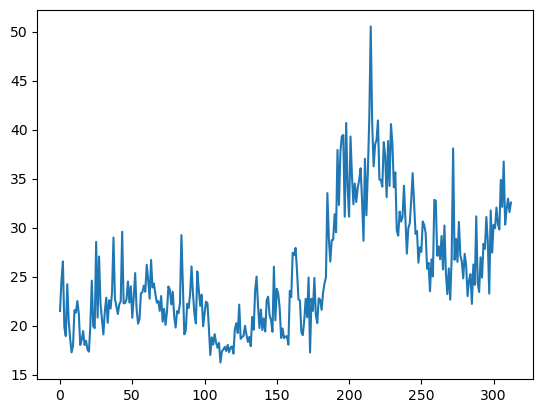

In [181]:
# Assuming X_test is a DataFrame
X_test_array = X_test.to_numpy()

# Reshape the array
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], timesteps, X_test_array.shape[1])

# Make predictions using the trained LSTM model
predictions = model.predict(X_test_reshaped)

# Reshape the predictions to match the original format
predictions = predictions.reshape(predictions.shape[0], 1)

plt.plot(predictions)
print(predictions.shape)

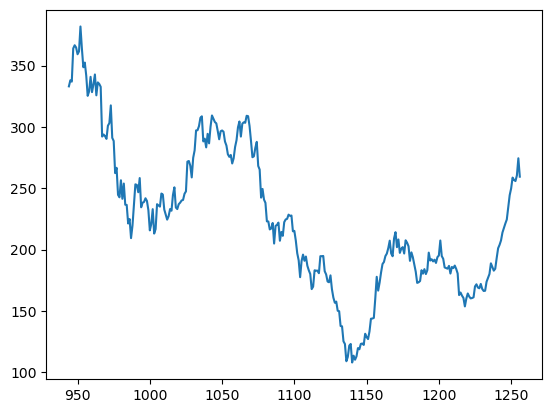

In [182]:
plt.plot(y_test)

# Adding Lag And Running Through Diffrent Models

In [183]:
for i in range(1,3):
    X_train["Open_lag"+str(i)]=X_train["Open"].shift(i)
    X_train["High_lag"+str(i)]=X_train["High"].shift(i)
    X_train["Low_lag"+str(i)]=X_train["Low"].shift(i)
    X_train["Volume_lag"+str(i)]=X_train["Volume"].shift(i)
    X_train["Closing_lag"+str(i)]=y_train.shift(i)
X_train = X_train.dropna()
print(X_train)
print(X_train.shape)


      Open   High    Low     Volume  Open_lag1  High_lag1  Low_lag1  \
4    23.24  23.80  23.07  125970000      23.00      23.39     22.63   
5    23.56  23.59  22.83   97386000      23.24      23.80     23.07   
6    24.00  24.32  21.99  281397000      23.56      23.59     22.83   
7    22.12  22.17  20.65  184239000      24.00      24.32     21.99   
8    20.92  20.96  19.75  262146000      22.12      22.17     20.65   
..     ...    ...    ...        ...        ...        ...       ...   
935 283.82 284.82 270.12   58648500     279.83     286.85    277.34   
936 280.07 281.27 264.59   67037100     283.82     284.82    270.12   
937 260.20 266.90 252.01   71152200     280.07     281.27    264.59   
938 258.42 268.52 252.19   66841200     260.20     266.90    252.01   
939 269.67 280.67 267.42   84028800     258.42     268.52    252.19   

     Volume_lag1  Closing_lag1  Open_lag2  High_lag2  Low_lag2  Volume_lag2  \
4   125005500.00         22.97      22.40      22.90     21.72 11178

In [184]:
for i in range(1,3):
    X_test["Open_lag"+str(i)]=X_test["Open"].shift(i)
    X_test["High_lag"+str(i)]=X_test["High"].shift(i)
    X_test["Low_lag"+str(i)]=X_test["Low"].shift(i)
    X_test["Volume_lag"+str(i)]=X_test["Volume"].shift(i)
    X_test["Closing_lag"+str(i)]=y_test.shift(i)
X_test = X_test.dropna()
print(X_test)
print(X_test.shape)

       Open   High    Low     Volume  Open_lag1  High_lag1  Low_lag1  \
946  336.00 340.60 332.44   62031600     336.58     341.50    329.60   
947  355.03 365.96 351.20  102506100     336.00     340.60    332.44   
948  369.33 371.59 357.70   73614900     355.03     365.96    351.20   
949  363.72 371.32 361.33   59865000     369.33     371.59    357.70   
950  364.86 367.71 358.88   48992700     363.72     371.32    361.33   
...     ...    ...    ...        ...        ...        ...       ...   
1250 247.94 250.97 244.59  150337900     249.07     252.42    242.02   
1251 253.51 259.68 251.34  162384300     247.94     250.97    244.59   
1252 260.17 261.57 250.50  170575500     253.51     259.68    251.34   
1253 248.40 258.95 247.29  160171200     260.17     261.57    250.50   
1254 258.92 263.60 257.21  167563700     248.40     258.95    247.29   

      Volume_lag1  Closing_lag1  Open_lag2  High_lag2  Low_lag2  Volume_lag2  \
946   68920800.00        337.97     326.65     346.90  

In [185]:
y_train=y_train.iloc[6:]
y_test=y_test.iloc[6:]
X_train = X_train.iloc[2:]
X_test = X_test.iloc[2:]
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(934, 1)
(934, 14)
(307, 1)
(307, 14)


# Using Lazy Regressor to Find Best Regressor

In [186]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor

In [187]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:04<00:00,  1.54s/it]


In [188]:
print(models)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
HuberRegressor                               0.95       0.95  12.83   
BayesianRidge                                0.95       0.95  12.86   
RidgeCV                                      0.95       0.95  12.86   
LassoLarsIC                                  0.95       0.95  12.90   
Lars                                         0.95       0.95  12.90   
LinearRegression                             0.95       0.95  12.90   
TransformedTargetRegressor                   0.95       0.95  12.90   
LassoLars                                    0.95       0.95  12.93   
OrthogonalMatchingPursuitCV                  0.95       0.95  13.04   
LarsCV                                       0.95       0.95  13.05   
LassoLarsCV                                  0.95       0.95  13.06   
Lasso                                        0.95       0.95  13.09   
Ridge 

In [189]:
print(predictions,y_test)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
HuberRegressor                               0.95       0.95  12.83   
BayesianRidge                                0.95       0.95  12.86   
RidgeCV                                      0.95       0.95  12.86   
LassoLarsIC                                  0.95       0.95  12.90   
Lars                                         0.95       0.95  12.90   
LinearRegression                             0.95       0.95  12.90   
TransformedTargetRegressor                   0.95       0.95  12.90   
LassoLars                                    0.95       0.95  12.93   
OrthogonalMatchingPursuitCV                  0.95       0.95  13.04   
LarsCV                                       0.95       0.95  13.05   
LassoLarsCV                                  0.95       0.95  13.06   
Lasso                                        0.95       0.95  13.09   
Ridge 

# Prediction Of Stock Price 3 days In Future with  AdaBoostRegressor

In [190]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
res=regr.predict(X_test)
print(res,y_test)


[366.10374616 366.10374616 366.10374616 366.10374616 372.40703145
 366.10374616 362.67505112 356.417471   349.79386354 325.50170294
 325.50170294 325.50170294 346.05841635 325.50170294 346.05841635
 346.05841635 362.67505112 349.02559543 325.50170294 322.62247227
 318.13167511 307.42040463 310.54051724 299.43078554 310.00721095
 302.20160056 321.01098021 289.56437781 279.87313396 275.16226261
 275.16226261 271.09349598 265.64400689 266.89228537 258.17374305
 259.58079569 237.93640061 217.94217495 216.19379103 212.06965746
 216.19379103 217.94217495 258.17374305 268.29568457 268.29568457
 268.29568457 243.57333295 237.93640061 229.5644078  243.57333295
 258.17374305 223.25034062 217.94217495 216.19379103 217.94217495
 216.19379103 215.13621058 230.12362312 237.93640061 223.25034062
 237.93640061 265.64400689 243.57333295 221.92762974 219.83809362
 221.92762974 217.94217495 223.25034062 237.93640061 265.64400689
 259.58079569 223.25034062 230.12362312 223.25034062 230.31800689
 246.34374

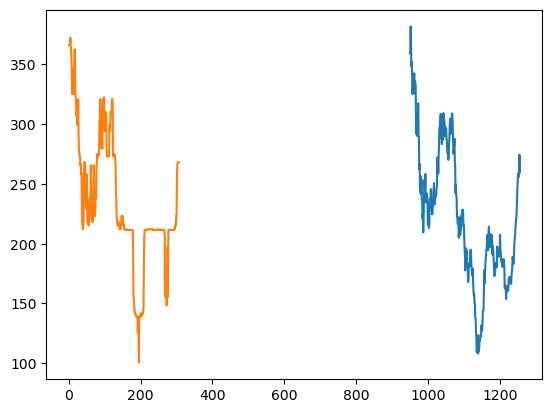

In [191]:
plt.plot(y_test)
plt.plot(res)

# Prediction Of Stock Price 3 days In Future with XGBoost

In [192]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train,y_train)

# make predictions for test data
predictions = my_model.predict(X_test)
print(y_test,predictions)

from sklearn.metrics import mean_absolute_error   
meanerror = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:",(meanerror))

      Close
950  359.20
951  361.53
952  381.82
953  363.75
954  348.59
...     ...
1252 256.79
1253 255.90
1254 260.54
1255 274.45
1256 259.46

[307 rows x 1 columns] [368.03302  368.95792  380.14447  371.30576  357.27493  360.04407
 352.13635  355.19803  340.16635  319.27914  327.98795  333.8726
 331.0389   336.9414   336.45248  322.64114  355.24005  339.5826
 328.7523   311.7887   320.97064  302.11963  326.6951   293.08072
 327.72345  285.27136  308.54254  293.0781   283.4423   273.46973
 273.11813  250.07057  246.1846   244.99657  232.30661  245.39275
 234.41719  213.12025  216.8253   219.02954  221.84438  219.1606
 229.55708  253.43587  253.11961  255.33244  248.08118  238.55476
 234.2081   240.45322  240.08405  224.37822  222.40643  220.1491
 224.49724  220.30731  217.31294  219.40706  230.59595  223.95415
 239.47472  248.28358  243.06763  214.75758  220.06969  222.76958
 212.84418  227.42914  238.98425  247.54729  250.07869  219.68633
 229.13966  224.03046  238.22943  234.03665 

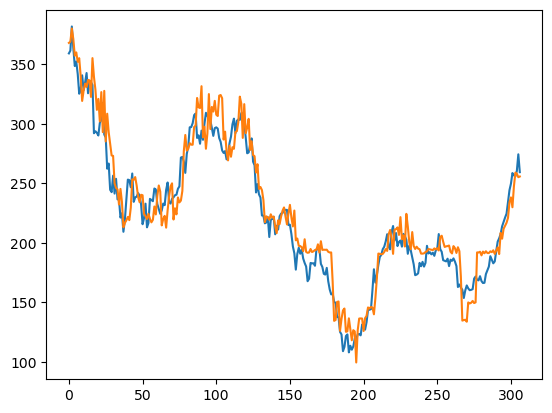

In [193]:
y_test = y_test.reset_index(drop=True)
plt.plot(y_test)
plt.plot(predictions)

# Prediction Using Lag on Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred=pd.DataFrame(reg.predict(X_test))
print(reg.score(X_test, y_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(y_test,y_pred)
print("The Mean Absolute Error Is:",mean_absolute_error(y_test, y_pred))

0.9495458485141929
10.07586304031188
     Close
0   359.20
1   361.53
2   381.82
3   363.75
4   348.59
..     ...
302 256.79
303 255.90
304 260.54
305 274.45
306 259.46

[307 rows x 1 columns]          0
0   358.66
1   365.19
2   361.73
3   362.24
4   377.16
..     ...
302 246.69
303 256.60
304 251.62
305 256.06
306 261.06

[307 rows x 1 columns]
The Mean Absolute Error Is: 10.07586304031188


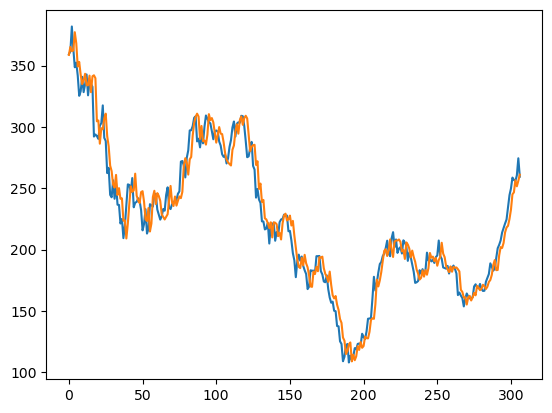

In [195]:
plt.plot(y_test)
plt.plot(y_pred)